In [0]:
import random

import numpy as np
import matplotlib.pyplot as plt

random.seed(1)

**Chinese Restaurant Process**

In [0]:
def chinese_restaurant_process(num_customers, alpha):
  table_assignments = [1]

  for i in range(2, num_customers+1):
    prob = 0
    existing_table = False
    rand = random.random()
    for index, count in enumerate(table_assignments):
      prob += count/(i+alpha)

      if rand < prob:
        table_assignments[index] += 1
        existing_table = True
        break

    if not existing_table:
      table_assignments.append(1)

  return table_assignments

In [40]:
print(chinese_restaurant_process(100, 0.2))
print(chinese_restaurant_process(100, 2))
print(chinese_restaurant_process(100, 5))
print(chinese_restaurant_process(100, 10))

[30, 42, 19, 4, 5]
[38, 18, 38, 1, 2, 2, 1]
[8, 19, 22, 1, 2, 3, 3, 9, 3, 4, 2, 1, 5, 1, 3, 4, 2, 3, 1, 1, 1, 1, 1]
[3, 14, 5, 5, 19, 14, 1, 3, 9, 1, 1, 3, 1, 3, 4, 1, 1, 2, 2, 3, 1, 1, 2, 1]


**Poly Urn**

In [0]:
def base_color_distribution():
  return np.random.uniform(0,1,1)

In [0]:
def poly_urn(base_color_distribution, num_balls, alpha):
  if num_balls <=0:
    return []

  balls_in_urn = []

  for i in range(0, num_balls+1):
    prob = 0
    rand = random.random()

    if rand < alpha/(alpha + len(balls_in_urn)):
      new_color = base_color_distribution()
      balls_in_urn.append(new_color)
    else:
      ball = balls_in_urn[np.random.choice(len(balls_in_urn), 1)[0]]
      balls_in_urn.append(ball)
  return balls_in_urn

In [43]:
print(poly_urn(base_color_distribution, num_balls=10, alpha=0.2))
print(poly_urn(base_color_distribution, num_balls=10, alpha=1))
print(poly_urn(base_color_distribution, num_balls=10, alpha=5))

[array([0.68000468]), array([0.68000468]), array([0.68000468]), array([0.68000468]), array([0.68000468]), array([0.68000468]), array([0.68000468]), array([0.68000468]), array([0.68000468]), array([0.68000468]), array([0.68000468])]
[array([0.11190331]), array([0.68280481]), array([0.11190331]), array([0.11190331]), array([0.11190331]), array([0.68280481]), array([0.68280481]), array([0.11190331]), array([0.11190331]), array([0.11190331]), array([0.11190331])]
[array([0.32323493]), array([0.32323493]), array([0.32323493]), array([0.51643684]), array([0.02672651]), array([0.4175916]), array([0.59866597]), array([0.4175916]), array([0.32323493]), array([0.54539798]), array([0.4175916])]


**Stick Breaking**

In [0]:
num_weights = 10

In [0]:
def stick_breaking(num_weights, alpha):
    theta = np.random.beta(1, alpha, size=num_weights)
    theta[1:] *= np.cumprod(1 - theta[:-1])
    return theta

[2.96671538e-01 5.77436960e-01 2.74437754e-02 9.06970633e-02
 3.22331148e-03 4.41931207e-03 1.03580962e-04 9.61805080e-07
 2.62732175e-07 1.12883122e-06]


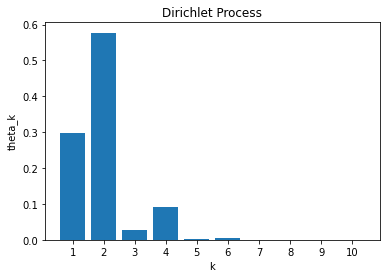

In [46]:
theta = stick_breaking(num_weights, 0.5)
print(theta)
plt.bar([i+1 for i in range(num_weights)], theta)
plt.xticks([i+1 for i in range(num_weights)])
plt.title("Dirichlet Process")
plt.xlabel("k")
plt.ylabel("theta_k")
plt.show()